<center><h1> IFT-6758  </h1></center>
<center><h1> Data Science / Science des données  </h1></center> 
<center><h2> Fall-2021 </h2></center> 
<center><h3> Prog 3 </h3></center> 
<center><h3> </h3></center> 



Deadline    : **Dec 05, 11.59 pm EDT** on [Gradescope](https://www.gradescope.com/courses/286503/assignments/1679434)

---

Date limite :  **Le 05 déc, 23h59 HAE** sur [Gradescope](https://www.gradescope.com/courses/286503/assignments/1679434)

**Please use only the following imports.**

**DO NOT IMPORT ANYTHING OTHER THAN SUB-PACKAGES OF THESE WHEN NECESSARY.**

This is important for running you code!

---

**Veuillez utiliser uniquement les importations suivantes.**

**N'IMPORTEZ RIEN D'AUTRE DES SOUS-PACKAGES DE CEUX-CI LORSQUE NÉCESSAIRE.**

Ceci est important pour exécuter votre code!

In [1]:
#@title Imports (Run this cell first / Lancez d'abord cette cellule) { run: "auto" }

# Imports / Importations
import sklearn

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import random
import itertools

[3 points]

## Q1. Given train and test dataframes, train a model using `LinearSVC` to perform the classification to predict the `target` field (binary classification) and return the classification metrics specified **using the test dataframe** to determine if there is any bias based on the `criterion` field :



- True Positive Rate (TPR)
- False Positive Rate (FPR)
- $ disparity = \frac{P(predicted~target=1|criterion=1)}{P(predicted~target=1|criterion=0)} $

    **[Use only sklearn]**

    Think (no need to explain anything): Are the penguins in the dataset discriminated based on their `bill_color` ("beak" color) to be offered the `jellyfish_delight` (special food)?
---

## Q1. Étant donné des dataframes d'entraînement et de test, entraînez un modèle en utilisant le `LinearSVC` pour effectuer la classification afin de prédire le champ `target` «cible» (classification binaire) et retournez les métriques de classification spécifiées **à l'aide de la dataframe de test** pour déterminer s'il existe des biais basés sur le champ `criterion` «critère»


- Taux de vrais positifs (TPR)
- Taux de faux positifs (FPR)
- $ disparity = \frac{P(target~predit=1|criterion=1)}{P(target ~predit=1|criterion=0)} $

    **[Utilisez sklearn seulement]**

    Réfléchissez (pas besoin d'expliquer quoi que ce soit) : les pingouins de l'ensemble de données sont-ils discriminés en fonction de leur `bill_color` (couleur du bec) pour se voir offrir le `jellyfish_delight` (nourriture spéciale)?

In [2]:
from sklearn.svm import LinearSVC
from sklearn import metrics

In [3]:
# Sample data inits / Initialisations des exemples de données

train_df = pd.read_csv('https://raw.githubusercontent.com/ift-6758/files/main/train_penguins.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/ift-6758/files/main/test_penguins.csv')

In [4]:
train_df

,bill_length,bill_depth,flipper_length,body_mass,bill_color,loc1,loc2,loc3,jellyfish_delight
0,-0.386050,0.615395,-1.076011,2.157984,0,0,1,0,0
1,-0.806946,0.110002,0.999560,1.755919,0,0,1,0,0
2,1.425629,0.194234,0.446074,-0.254405,0,0,1,0,1
3,-0.056654,-0.311159,0.030960,0.549725,0,1,0,0,0
4,1.572027,0.025770,1.137931,-0.713908,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
145,-0.587348,0.531163,0.446074,-0.599032,1,0,0,1,0
146,-0.843545,-1.321946,0.030960,-1.632913,1,0,1,0,0
147,-0.989944,-1.490411,-1.491126,-1.977540,1,1,0,0,0
148,0.693637,-1.153482,0.446074,-0.139529,1,0,1,0,1


In [5]:
def q1(train=train_df, test=test_df, criterion='bill_color', target='jellyfish_delight'):
  """
  Your solution / Votre solution
  """
  X_train = train.drop(target, axis=1)
  y_train = train[target]
  model = LinearSVC()
  model.fit(X_train, y_train)

  X_test = test.drop(target, axis=1)
  y_test = test[target]

  y_pred = model.predict(X_test)
  tp = np.sum((y_pred == 1) & (y_test == 1))
  fp = np.sum((y_pred == 1) & (y_test == 0)) 

  tn = np.sum((y_pred == 0) & (y_test == 0))
  fn = np.sum((y_pred == 0) & (y_test == 1))

  tpr = tp / (tp + fn)
  fpr = fp / (fp + tn) 

  #print((y_pred, y_test))
  y_pred1 = model.predict(X_test[X_test[criterion] == 1])
  y_pred0 = model.predict(X_test[X_test[criterion] == 0])

  disparity = y_pred1.mean() / y_pred0.mean()

  return tpr, fpr, disparity 

q1()

(1.0, 0.0, 1.6666666666666665)

[3 points]

## Q2. Given an image, transform it into its mirror image and make it lighter or darker by the given percentage.

**Arguments**

* `image` - an image that could be Grayscale or RGB
* `mirror_direction` - Two possible orientations for the mirror reflected image : `v` for vertical (reflection about horizontal axis) and `h` for horizontal (reflection about vertical axis) [*no typing error here*]
* `lighten_percentage` - Percentage by which the image needs to be lightened or darkened. Negative value indicates darkeing and positive value indicates lightening.

---

## Q2. Étant donné une image, transformez-la en son image miroir et rendez-la plus claire ou plus sombre du pourcentage donné.

**Arguments**

* `image` - une image qui peut être en niveaux de gris ou RVB
* `mirror_direction` - Deux orientations possibles pour l'image réfléchie par le miroir : `v` pour la verticale (réflexion autour de l'axe horizontal) et `h` pour l'horizontale (réflexion autour de l'axe vertical) [*pas de  faute de frappe ici*]
* `lighten_percentage` - Pourcentage dont l'image doit être éclaircie ou assombrie. Une valeur négative indique un assombrissement et une valeur positive indique un éclaircissement.

In [6]:
import cv2

import skimage
from skimage import io

In [7]:
# Sample data download / téléchargement de l'exemple de donnée

!wget https://github.com/ift-6758/files/raw/main/cat1.png

--2021-12-07 01:28:43--  https://github.com/ift-6758/files/raw/main/cat1.png
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ift-6758/files/main/cat1.png [following]
--2021-12-07 01:28:43--  https://raw.githubusercontent.com/ift-6758/files/main/cat1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108694 (106K) [image/png]
Saving to: ‘cat1.png.2’

cat1.png.2          100%[===================>] 106.15K  --.-KB/s    in 0.02s   

2021-12-07 01:28:43 (5.15 MB/s) - ‘cat1.png.2’ saved [108694/108694]



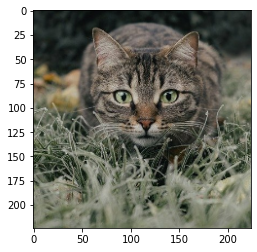

In [8]:
sample_image = io.imread('cat1.png')
plt.imshow(sample_image)

array([[[18, 21, 20],
        [19, 22, 21],
        [18, 22, 21],
        ...,
        [17, 20, 19],
        [17, 20, 19],
        [15, 19, 18]],

       [[18, 21, 20],
        [18, 21, 20],
        [17, 22, 20],
        ...,
        [18, 21, 20],
        [17, 20, 19],
        [16, 20, 18]],

       [[18, 21, 20],
        [19, 22, 21],
        [18, 21, 20],
        ...,
        [20, 23, 22],
        [17, 20, 19],
        [17, 21, 19]],

       ...,

       [[47, 52, 43],
        [47, 51, 43],
        [48, 52, 44],
        ...,
        [56, 60, 49],
        [50, 56, 44],
        [52, 57, 45]],

       [[49, 53, 44],
        [47, 52, 43],
        [44, 49, 41],
        ...,
        [52, 56, 44],
        [53, 59, 47],
        [48, 54, 42]],

       [[48, 53, 44],
        [49, 54, 45],
        [46, 50, 42],
        ...,
        [51, 55, 44],
        [49, 55, 42],
        [45, 52, 39]]], dtype=int32)

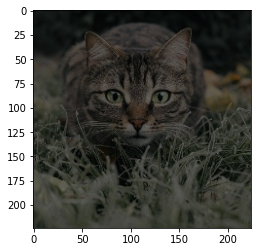

In [9]:
def q2(image=sample_image, mirror_direction='h', lighten_percentage=-50):

  # Checking for valid values of arguments / Vérification des valeurs valides des arguments
  assert mirror_direction in ['v','h']
  assert np.abs(lighten_percentage) <= 100
  """
  Your solution / Votre solution
  """
  plt.figure()
  #plt.imshow(image);
  if mirror_direction == 'v':
    output_image = np.flip(image, axis=0)
  elif mirror_direction == 'h':
    output_image = np.flip(image, axis=1)
  #plt.imshow(output_image);
  output_image = (output_image + (lighten_percentage/100) * output_image).astype('int32').clip(min=0, max=255)
  
  plt.imshow(output_image);

  return output_image

q2()

[3 points]

## Q3. Given a list of images arrays in RGB order and a pretrained Keras model for image classification, predict the class labels of the images with their respective confidence score. Refer to [`VGG-16`](https://keras.io/api/applications/vgg/#vgg16-function)  pretrained on [`ImageNet`](http://image-net.org/) for an example.

[1] Preprocess the images in `test_images` that can be used for prediction using `preprocess_input()`

[2] Decode the predicted class label with highest probability and the corresponding probability score for each image in the list

* **Input**  : `test_images` - list of test images to predict the class, `model` - the pretrained model trained on some image classification dataset, `module` - the name of the module of the pretrained model for importing.
* **Return** : `predicted_labels` - list of predicted label strings (example: `[apple,jellyfish,curtain]`), `confidence_scores` - list of probability values between 0 and 1 indicating confidence of the classified label (exemple: `[0.34217,0.15671,0.36872]`)

---

## Q3. Étant donné une liste d'arrays d'images dans l'ordre RVB et un modèle Keras pré-entraîné pour la classification d'images, prédisez les étiquettes de classe des images avec leur score de confiance respectif. Consultez le [`VGG-16`](https://keras.io/api/applications/vgg/#vgg16-function) pré-entraîné sur [`ImageNet`](http://image-net.org/) pour un exemple.

[1] Prétraitez les images dans `test_images` qui peuvent être utilisées pour la prédiction en utilisant `preprocess_input()`

[2] Décodez l'étiquette de classe prédite avec la probabilité plus élevée et le score de probabilité correspondant pour chaque image de la liste

* **Entrée** : `test_images` - liste d'images de test pour prédire la classe, `model` - le modèle pré-entraîné entraîné sur un ensemble de données de classification d'images, `module` - le nom du module du modèle pré-entraîné pour l'importation.
* **Retour** : `predicted_labels` - liste des strings d'étiquettes prédites (exemple: `[apple,jellyfish,curtain]`), `confidence_scores` - liste des valeurs de probabilité entre 0 et 1 indiquant la confiance de l'étiquette classée (exemple: `[0.34217,0.15671,0.36872]`)


In [10]:
import cv2

import skimage

In [11]:
# Sample data downloads / téléchargements des exemples de données

!wget https://github.com/ift-6758/files/raw/main/cat1.png
!wget https://github.com/ift-6758/files/raw/main/cat2.png
!wget https://github.com/ift-6758/files/raw/main/cat3.png

--2021-12-07 01:28:44--  https://github.com/ift-6758/files/raw/main/cat1.png
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ift-6758/files/main/cat1.png [following]
--2021-12-07 01:28:44--  https://raw.githubusercontent.com/ift-6758/files/main/cat1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108694 (106K) [image/png]
Saving to: ‘cat1.png.3’

cat1.png.3          100%[===================>] 106.15K  --.-KB/s    in 0.02s   

2021-12-07 01:28:44 (5.21 MB/s) - ‘cat1.png.3’ saved [108694/108694]

--2021-12-07 01:28:44--  https://github.com/ift-6758/files/raw/main/cat2.png
Resolving github.com 

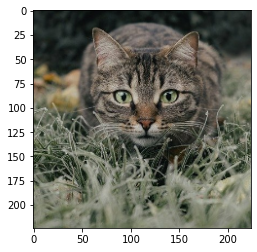

In [12]:
sample_images = [skimage.io.imread('cat{:0d}.png'.format(i+1)) for i in range(3)]
plt.imshow(sample_images[0])

In [13]:
import importlib

test_model_module = 'keras.applications.vgg16'
test_model = importlib.import_module(test_model_module).VGG16(weights='imagenet')

553476096/553467096 [==============================] - 4s 0us/step


In [14]:
def q3(test_images=sample_images, model=test_model, module=test_model_module):
  
  # Importing the required functions from the module of the model / Importation des fonctions requises provenant du module du modèle
  module = importlib.import_module(module)
  
  """
  Your solution / Votre solution
  """
  test_images = module.preprocess_input(np.array(test_images))
  #y_pred = [model.predict(test_images[i]) for i in range(3)]
  y_pred = model.predict(test_images)
  preds = module.decode_predictions(y_pred, top=1)
  predicted_labels = [item[0][1] for item in preds]
  confidence_scores = [item[0][2] for item in preds]

  assert len(predicted_labels)==len(test_images)
  assert len(predicted_labels)==len(confidence_scores)

  return predicted_labels, confidence_scores

q3()

49152/35363 [=========================================] - 0s 0us/step


(['tiger_cat', 'tiger_cat', 'oscilloscope'],
 [0.68811727, 0.40573317, 0.12098838])

[4 points]

##Q4. Given a square `image`, return the patch-wise pixel histogram features from the image according to the following description :   

* `max_pixel_value` - maximum pixel value in the image. The pixels can range between 0 and `max_pixel_value`.
* `num_bins` - number of bins to divide the range 0 to `max_pixel_value` to calculate the counts of values in these range.
* `windows_length` - length of the non-overlapping windows into which the image is divided to generate the histogram features. It can be assumed to always exactly divide the image length (in pixels).
* The number of pixels in each range is taken across all channels of the image. A patch defined by the `window_length = 4` and 3 channels will contain 4x4x3 = 48 pixels.

* Return the numpy array of these patch-wise pixel histogram features in raster order.

  For example, an input 8x8 `image` with `max_pixel_value = 256`, when applied a `window_length = 4` and `num_bins = 8` will produce 32 dimensional features (=4 patches x 8 bins) in raster order of patches (left → right)

---

##Q4. Étant donné une `image` carrée, retournez les caractéristiques de l'histogramme de pixels par patch à partir de l'image selon la description suivante :

* `max_pixel_value` - valeur maximale de pixel dans l'image. Les pixels peuvent être compris entre 0 et `max_pixel_value`.
* `num_bins` - nombre de casiers pour diviser la plage 0 à `max_pixel_value` pour calculer le nombre de valeurs dans cette plage.
* `windows_length` - longueur des fenêtres sans chevauchement dans lesquelles l'image est divisée pour générer les caractéristiques de l'histogramme. On peut supposer qu'il divise toujours exactement la longueur de l'image (en pixels).
* Le nombre de pixels dans chaque plage est pris sur tous les canaux de l'image. Un patch défini par `window_length = 4` et 3 canaux contiendra 4x4x3 = 48 pixels.

* Retournez l'array numpy de ces caractéristiques d'histogramme de pixels par patch dans l'ordre raster.

  Par exemple, une `image` 8x8 d'entrée avec `max_pixel_value = 256`, lorsqu'elle est appliquée, `window_length = 4` et `num_bins = 8` produira les caractéristiques 32 dimensionnelles (=4 patches x 8 bins) dans l'ordre raster des patchs (gauche → droite)

In [15]:
import cv2

import skimage

In [16]:
# Sample data download / téléchargement de l'exemple de donnée

!wget https://github.com/ift-6758/files/raw/main/cat1.png

--2021-12-07 01:28:55--  https://github.com/ift-6758/files/raw/main/cat1.png
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ift-6758/files/main/cat1.png [following]
--2021-12-07 01:28:55--  https://raw.githubusercontent.com/ift-6758/files/main/cat1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108694 (106K) [image/png]
Saving to: ‘cat1.png.4’

cat1.png.4          100%[===================>] 106.15K  --.-KB/s    in 0.02s   

2021-12-07 01:28:56 (5.25 MB/s) - ‘cat1.png.4’ saved [108694/108694]



In [17]:
sample_image = skimage.io.imread('cat1.png')

In [18]:
def q4(image=sample_image, num_bins=16, window_length=32, max_pixel_value=255):
  """
  Your solution / Votre solution
  """
  img_size = image.shape
  #print(img_size)
  path_pixel_hist = []
  for y_pos in range(0, img_size[0], window_length):
    for x_pos in range(0, img_size[1], window_length):
      patch = image[y_pos:y_pos+window_length, x_pos:x_pos+window_length, :]
      hists = []
      for channel in range(3):
        hist = cv2.calcHist([patch],[channel],None,[num_bins],[0,max_pixel_value+1])
        hists.append(hist.reshape((-1,)))

      res = np.stack(hists)
      path_pixel_hist.append(res.sum(axis=0))


  path_pixel_hist = np.concatenate(path_pixel_hist).astype('int32')

  return path_pixel_hist

q4()

array([  40, 1057, 1574,  393,    8,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,  519, 1479,  742,  256,   30,   18,
         13,    5,    7,    3,    0,    0,    0,    0,    0,    0,  264,
       1318,  241,  106,  125,  246,  365,  233,  103,   53,   13,    5,
          0,    0,    0,    0,  146,  899,  207,   37,   34,  222,  568,
        730,  212,   17,    0,    0,    0,    0,    0,    0,  424, 1066,
        276,  119,   82,  174,  434,  374,   94,   17,    8,    4,    0,
          0,    0,    0,  106, 1002, 1119,  503,  196,   67,   40,   27,
          9,    2,    1,    0,    0,    0,    0,    0,    1,  575, 2058,
        433,    5,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,   31, 1311, 1086,  310,  125,   72,   42,   33,   34,
         25,    3,    0,    0,    0,    0,    0,   64,  824,  743,  267,
        198,  273,  387,  237,   67,    7,    5,    0,    0,    0,    0,
          0,    0,    7,   29,   65,  190,  307,  4

In [19]:
hists = []
for channel in range(3):
  hist = cv2.calcHist([sample_image],[channel],None,[16],[0,256])
  hists.append(hist.reshape((-1,)))
  print(hist.reshape((-1,)).shape)

np.stack(hists).shape

(16,)
(16,)
(16,)


(3, 16)

[3 points] 

## Q5. Given a list of text data, compute and return the feature representations of the text data according to the following description : A new type of features called the Bag-of-Parts-of-Speech (boPOS) is proposed to identify the POS tags for each word in the sentence based on a given `tagset` and represent the count of different POS tags as features (similar to BoW). Assume that no other preprocessing is required.  

**Return** 

* `boPOS_features` - the feature representations of the input `sentence_list` with BoPOS feature representations for each sentence as a numpy array.
* `pos_order` - list of strings with the order of the POS tags represented in the feature vectors **sorted alphabetically (increasing) by tag name**.



---

## Q5. Étant donné une liste de données textuelles, calculez et returnez les représentations des caractéristiques des données textuelles selon la description suivante : Un nouveau type de caractéristiques appelé Sac-de-partie-de-discours (boPOS) est proposé pour identifier les balises POS pour chaque mot de la phrase basé sur un `tagset` donné et représente le nombre de différentes balises POS en tant que caractéristiques (similaires à BoW). Supposons qu'aucun autre prétraitement n'est requis.

**Retour**

* `boPOS_features` - les représentations des caractéristiques de l'entrée `sentence_list` avec les représentations des caractéristiques BoPOS pour chaque phrase comme un array numpy.
* `pos_order` - liste des strings avec l'ordre des balises POS représentées dans les vecteurs de caractéristiques **triés par ordre alphabétique (croissant) par nom de balise.**




In [20]:
import nltk
nltk.download('tagsets')
nltk.download('punkt')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Sample data download / téléchargements des exemples de données

!wget -q https://raw.githubusercontent.com/ift-6758/files/main/text-data.txt

with open('text-data.txt', 'r') as f:
  text_data = f.read().splitlines()

In [22]:
def q5(sentences_list=text_data, tagset='universal'):

    """
    Your solution / Votre solution
    """
    nltk.download('averaged_perceptron_tagger')
    nltk.download('universal_tagset')
    boPOS_dicts = []
    tag_list = []

    for sentence in sentences_list:
      tokens = nltk.word_tokenize(sentence)
      tagged = nltk.pos_tag(tokens, tagset=tagset)
      tag_dict = {}
      for pair in tagged:
        if pair[1] in tag_dict:
          tag_dict[pair[1]] += 1
        else:
          tag_dict[pair[1]] = 1
      tag_list.extend(list(tag_dict.keys()))
      boPOS_dicts.append(tag_dict)

    boPOS_features = []
    pos_order = np.unique(np.array(tag_list))
    #print(boPOS_dicts[0])
    for tag_dict in boPOS_dicts:
      feat = []
      for tag in pos_order:
        if tag in tag_dict:
          feat.append(tag_dict[tag])
        else:
          feat.append(0)
      boPOS_features.append(np.array(feat))


    boPOS_features = np.array(boPOS_features)

    assert boPOS_features.shape[0] == len(sentences_list)
    assert boPOS_features.shape[1] == len(pos_order)

    return boPOS_features, pos_order

q5()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


(array([[0, 0, 1, 0, 2, 2, 0, 0, 1, 1],
        [1, 0, 1, 1, 1, 2, 0, 1, 0, 1],
        [0, 1, 1, 0, 2, 3, 0, 0, 0, 1],
        [2, 3, 0, 0, 3, 5, 1, 0, 0, 4],
        [0, 1, 1, 0, 5, 5, 1, 0, 1, 4],
        [0, 1, 0, 0, 1, 3, 0, 1, 0, 1],
        [1, 0, 0, 0, 2, 2, 0, 0, 0, 1],
        [2, 0, 0, 0, 2, 2, 0, 0, 1, 2],
        [1, 1, 2, 0, 2, 2, 0, 0, 0, 2],
        [0, 1, 1, 0, 2, 3, 0, 0, 0, 1],
        [0, 0, 1, 0, 1, 2, 0, 0, 0, 3],
        [0, 0, 0, 0, 3, 3, 0, 0, 2, 1],
        [1, 1, 0, 0, 2, 4, 0, 0, 0, 1],
        [1, 0, 1, 0, 2, 2, 0, 0, 0, 2],
        [1, 0, 0, 0, 3, 2, 0, 0, 0, 1],
        [2, 0, 0, 0, 2, 1, 0, 0, 0, 2],
        [1, 0, 1, 0, 1, 1, 0, 0, 0, 2],
        [2, 0, 0, 0, 2, 2, 0, 0, 0, 1],
        [2, 0, 0, 0, 2, 2, 0, 0, 0, 1],
        [1, 1, 0, 0, 2, 3, 0, 0, 0, 1],
        [2, 0, 0, 0, 2, 2, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 2],
        [2, 1, 0, 0, 1, 2, 0, 0, 0, 1],
        [1, 1, 1, 0, 1, 2, 0, 0, 0, 2]]),
 array(['ADJ', 'ADP', 'ADV', 'CONJ', '

In [23]:
text_data

['a fool always rushes to the fore',
 'a fool and his money are soon parted',
 'a fool at forty is a fool indeed',
 'a fool may ask more questions in an hour than a wise man can answer in seven years',
 'a fool may throw a stone into a well which a hundred wise men cannot pull out',
 'a fool tongue runs before his wit',
 'a forced kindness deserves no thanks',
 'a foul morn may turn to a fair day',
 'a fox is not taken twice in the same snare',
 'a friend in need is a friend indeed',
 'a friend is never known till needed',
 'a friend to all is a friend to none',
 'a friend frown is better than a foe smile',
 'a good anvil does not fear the hammer',
 'a good beginning is half the battle',
 'a good beginning makes a good ending',
 'a good deed is never lost',
 'a good dog deserves a good bone',
 'a good example is the best sermon',
 'a good face is a letter of recommendation',
 'a good jack makes a good jill',
 'a good marksman may miss',
 'a good name is better than riches',
 'a good na

In [24]:
tokens = nltk.word_tokenize(text_data[0])
tokens

['a', 'fool', 'always', 'rushes', 'to', 'the', 'fore']

In [25]:
tagged = nltk.pos_tag(tokens, tagset='universal')
print(tagged)

[('a', 'DET'), ('fool', 'NOUN'), ('always', 'ADV'), ('rushes', 'VERB'), ('to', 'PRT'), ('the', 'DET'), ('fore', 'NOUN')]


In [26]:
dic = {'DET': 2, 'NOUN': 2, 'ADV': 1, 'VERB': 1, 'PRT': 1}
if 'FGH' in dic:
  print('yo')

[4 points] 

## Q6. Given a list of text data, compute and return the word co-occurence count matrix based on the text. Assume that no other preprocessing of the words is required.  

* For the ordering of words in the rows and columns, sort the words in the vocabulary in simple alphabetical order (increasing)
* Return the word co-occurence count matrix `wco_matrix` based on the given `context_length` and the corresponding `word_order`
* Plese note that the matrix you return should be useable for learning GloVe embeddings .
* Refer to `Lecture_19_NLP_part3` - slide 6 for an example for `context_length=2` (Every two words occurring together in a context window of size 2 contribute to a count).

---

## Q6. Étant donné une liste de données de texte, calculez et renvoyez la matrice de nombre de co-occurrences de mots en fonction du texte. Supposons qu'aucun autre prétraitement des motes n'est requis.

* Pour l'ordre des mots dans les lignes et les colonnes, triez les mots du vocabulaire par ordre alphabétique simple (croissant)
* Retournez la matrice de comptage de co-occurrences de mots `wco_matrix` basée sur la `context_length` donnée et le `word_order` correspondant
* Veuillez noter que la matrice que vous retournez doit être utilisable pour l'apprentissage des plongements GloVe.
* Référez-vous à `Lecture_19_NLP_part3` - slide 6 pour un exemple pour `context_length=2` (Chaque deux mots apparaissant ensemble dans une fenêtre de contexte de taille 2 contribuent à un décompte).


In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
# Sample data download / téléchargements des exemples de données

!wget -q https://raw.githubusercontent.com/ift-6758/files/main/text-data.txt

with open('text-data.txt', 'r') as f:
  text_data = f.read().splitlines()

In [29]:
text_data

['a fool always rushes to the fore',
 'a fool and his money are soon parted',
 'a fool at forty is a fool indeed',
 'a fool may ask more questions in an hour than a wise man can answer in seven years',
 'a fool may throw a stone into a well which a hundred wise men cannot pull out',
 'a fool tongue runs before his wit',
 'a forced kindness deserves no thanks',
 'a foul morn may turn to a fair day',
 'a fox is not taken twice in the same snare',
 'a friend in need is a friend indeed',
 'a friend is never known till needed',
 'a friend to all is a friend to none',
 'a friend frown is better than a foe smile',
 'a good anvil does not fear the hammer',
 'a good beginning is half the battle',
 'a good beginning makes a good ending',
 'a good deed is never lost',
 'a good dog deserves a good bone',
 'a good example is the best sermon',
 'a good face is a letter of recommendation',
 'a good jack makes a good jill',
 'a good marksman may miss',
 'a good name is better than riches',
 'a good na

In [30]:
def q6(sentences_list=text_data, context_length=2):
    
    """
    Your solution / Votre solution
    """
    context_length -= 1  # Since the context window includes the word itself, we need to exclude it
    vocab = []
    for sentence in sentences_list:
      tokens = nltk.word_tokenize(sentence)
      vocab.extend(tokens)
    
    word_order = np.unique(np.array(vocab))

    wco_matrix = np.zeros((word_order.size, word_order.size)) 

    idx_dict = {}
    for (idx, word) in enumerate(word_order):
      idx_dict[word] = idx

    for sentence in sentences_list:
      tokens = nltk.word_tokenize(sentence)
      for (idx, word) in enumerate(tokens):
        # Get context
        left_idx = max(0, idx - context_length)
        right_idx = min(idx + context_length, len(tokens) - 1)
        contexts = tokens[left_idx:idx] + tokens[idx+1:right_idx+1]
        for context in contexts:
          wco_matrix[idx_dict[word], idx_dict[context]] += 1



    # wco_matrix = np.array([[]])
    # word_order = list()

    assert wco_matrix.shape[0] == len(word_order)
    assert wco_matrix.shape[1] == len(word_order)

    return wco_matrix, word_order

q6()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['a', 'all', 'always', 'an', 'and', 'answer', 'anvil', 'are', 'ask',
        'at', 'battle', 'before', 'beginning', 'best', 'better', 'bone',
        'can', 'day', 'deed', 'deserves', 'does', 'dog', 'ending',
        'example', 'face', 'fair', 'fear', 'foe', 'fool', 'forced', 'fore',
        'forty', 'foul', 'fox', 'friend', 'frown', 'good', 'half',
        'hammer', 'his', 'hour', 'hundred', 'in', 'indeed', 'into', 'is',
        'jack', 'jill', 'kindness', 'known', 'letter', 'lost', 'makes',
        'man', 'marksman', 'may', 'men', 'miss', 'money', 'more', 'morn',
        'name', 'need', 'needed', 'never', 'no', 'none', 'not', 'of',
        'out', 'parted', 'pull', 'questions', 'recommendation', 'riches',
        'runs', 'rushes', 's

Packaging all the above functions into a class for the solution file to submit on Gradescope.

---

Empaqueter toutes les fonctions ci-dessus dans une classe pour le fichier de solution à remettre sur Gradescope.

In [31]:
class Prog3:
  
  def q1(self, train=train_df, test=test_df, criterion='bill_color', target='jellyfish_delight'):
    return q1(train, test, criterion, target)
  
  def q2(self,image=sample_image, mirror_direction='h', lighten_percentage=-50):
    return q2(image, mirror_direction, lighten_percentage)
  
  def q3(self, test_images = sample_images, model=test_model, module=test_model_module):
    return q3(test_images, model, module)

  def q4(self, image=sample_image, num_bins=16, window_length=32, max_pixel_value=255):
    return q4(image, num_bins, window_length, max_pixel_value)

  def q5(self, sentences_list=text_data, tagset='universal'):
    return q5(sentences_list, tagset)
  
  def q6(self, sentences_list=text_data, context_length=2):
    return q6(sentences_list, context_length)

(1.0, 0.0, 1.6666666666666665)
[[[18 21 20]
  [19 22 21]
  [18 22 21]
  ...
  [17 20 19]
  [17 20 19]
  [15 19 18]]

 [[18 21 20]
  [18 21 20]
  [17 22 20]
  ...
  [18 21 20]
  [17 20 19]
  [16 20 18]]

 [[18 21 20]
  [19 22 21]
  [18 21 20]
  ...
  [20 23 22]
  [17 20 19]
  [17 21 19]]

 ...

 [[47 52 43]
  [47 51 43]
  [48 52 44]
  ...
  [56 60 49]
  [50 56 44]
  [52 57 45]]

 [[49 53 44]
  [47 52 43]
  [44 49 41]
  ...
  [52 56 44]
  [53 59 47]
  [48 54 42]]

 [[48 53 44]
  [49 54 45]
  [46 50 42]
  ...
  [51 55 44]
  [49 55 42]
  [45 52 39]]]
(['tiger_cat', 'tiger_cat', 'oscilloscope'], [0.68811727, 0.40573317, 0.12098838])
[  40 1057 1574  393    8    0    0    0    0    0    0    0    0    0
    0    0  519 1479  742  256   30   18   13    5    7    3    0    0
    0    0    0    0  264 1318  241  106  125  246  365  233  103   53
   13    5    0    0    0    0  146  899  207   37   34  222  568  730
  212   17    0    0    0    0    0    0  424 1066  276  119   82  174
  434  37

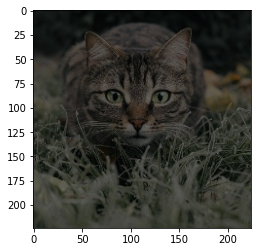

In [33]:
prog = Prog3()
print(prog.q1())
print(prog.q2())
print(prog.q3())
print(prog.q4())
print(prog.q5())
print(prog.q6())